In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Euler integration algorithm (will be used to compare)
def ode1(func, x0, t0, tf, h):
    t = np.arange(t0, tf+h, h)
    x = np.zeros((np.size(x0), t.size))
    x[:, 0] = x0
    for i in range(1, t.size):
        x[:, i] = h * func(t[i-1], x[:, i-1]) + x[:, i-1]
    return t, x

In [3]:
# K1 function
def k(r):
    return 2 * np.arctan(r)  / np.pi
# K1 function derivative
def dk(r):
    return 2 / (np.pi * (1 + r**2))

In [4]:
# Data
N = 51
x = np.linspace(0, 5, N)
X = np.array([np.ones((N,)), x]).T
y = 2 + 3 * x + np.random.normal(loc=0, scale=0.5, size=(N,))

In [5]:
def grad(b, X, y):
    return -2 * X.T.dot(y - X.dot(b))

In [6]:
# Continuous-time predefined-time function
def sys(t, b):
    r1 = 1
    r2 = 0
    r3 = np.linalg.eigvals(2 * X.T.dot(X)).min()
    norm_grad = np.linalg.norm(grad(b, X, y))
    return (-1 /  (r1 * (1 - r2) * r3)) * (k(norm_grad)**r2 / dk(norm_grad)) * (grad(b, X, y) / norm_grad)

In [7]:
# Parameters
r1 = 1
h = 1e-7
b0 = np.array([0, 1])
# Explicit Euler simulation
t0, tf = 0, r1
t, b = ode1(sys, b0, t0, tf, h)

In [8]:
b0, b1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [9]:
b0, b1

(2.042129651303962, 3.025987106731658)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


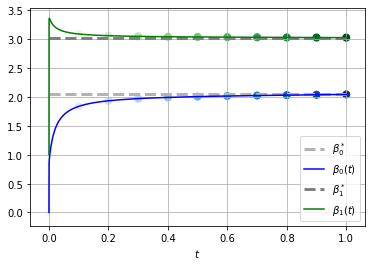

In [16]:
sample = np.linspace(0, 1, 11) / h
plt.figure()
plt.plot([t0, tf], [b0, b0], '--', lw=3, color=0.7*np.ones(3), label=r'$\beta_0^*$')
plt.plot(t, b[0], 'b', label=r'$\beta_0(t)$')
plt.plot([t0, tf], [b1, b1], '--', lw=3, color=0.5*np.ones(3), label=r'$\beta_1^*$')
plt.plot(t, b[1], 'g', label=r'$\beta_1(t)$')
plt.scatter(t[sample.astype(int)], b[0][sample.astype(int)], s=50, c=t[sample.astype(int)], cmap='Blues')
plt.scatter(t[sample.astype(int)], b[1][sample.astype(int)], s=50, c=t[sample.astype(int)], cmap='Greens')
plt.grid()
plt.xlabel('$t$')
plt.legend(loc='best')
plt.savefig('figures/parameters.eps', bbox_inches='tight', format='eps', dpi=1500)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


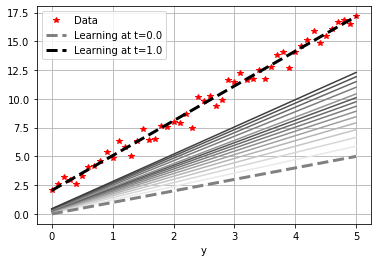

In [17]:
for i in range(0, 50, 5):
    plt.plot(x, X.dot(b.T[i]), color = (1 - (i+1)/70)*np.ones(3))
for i in range(50, 100, 10):
    plt.plot(x, X.dot(b.T[i]), color = (1 - (i+1)/120)*np.ones(3))

    
plt.plot(x, y, '*r', label='Data')
        
plt.plot(x, X.dot(b.T[0]), '--', lw=3, color = 0.5*np.ones(3), label='Learning at t=0.0')    
plt.plot(x, X.dot(b.T[-1]), '--', lw=3, color = 0*np.ones(3), label='Learning at t=1.0')

plt.grid()
plt.xlabel('x')
plt.xlabel('y')
plt.legend(loc='best')
plt.savefig('figures/lines.eps', bbox_inches='tight', format='eps', dpi=1500)